<a href="https://colab.research.google.com/github/nicolassalomon96/IA_Identificacion_y_Control/blob/main/TP2/Perceptr%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clasificador con Perceptrón

Generar el código para el diseño automático del clasificador basado en un aprendizaje supervisado. Emplear cualquiera de las leyes de aprendizaje estudiadas: gradiente descendente, Levenberg-Marquardt, o Mínimos Cuadrados Recursivo

Autor: Nicolás Salomón - email: nicolassalomon96@gmail.com

## 1. Importamos las librerias necesarias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

## 2.Visualizamos un ejemplo de los Clusters a clasificar

In [ ]:
#Cantidad de muestras de cada cluster
samples_A = 1000 
samples_B = 1000

cluster_A = []
cluster_B = []

for i in range(samples_A):
  cluster_A.append((np.random.uniform(0,1), np.random.uniform(2,3)))
cluster_A = np.array(cluster_A)

for i in range(samples_B):
  cluster_B.append((np.random.uniform(2,3), np.random.uniform(0,1)))
cluster_B = np.array(cluster_B)

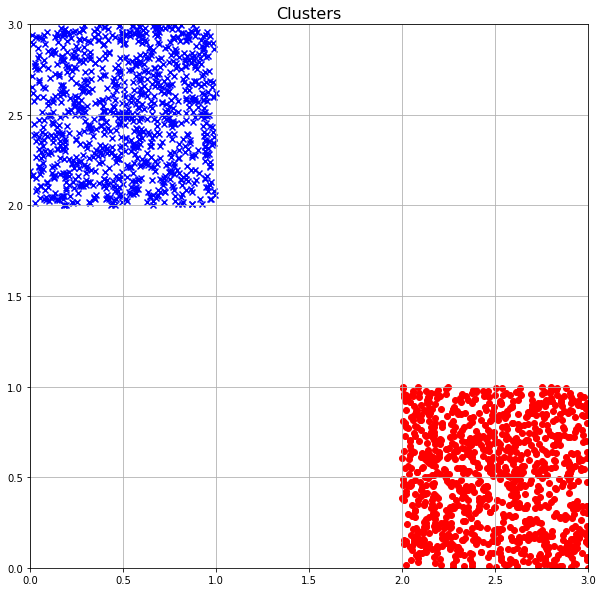

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.scatter(cluster_A[:,0], cluster_A[:,1], marker='x', color='blue')
plt.scatter(cluster_B[:,0], cluster_B[:,1], marker='o', color='red')
plt.xlim((0,3))
plt.ylim((0,3))
plt.title('Clusters', fontsize=16)
plt.grid()

## 3. Creamos de la Neurona

In [ ]:
class Neurona():

  def __init__(self, lr, iterations, activation = 'sigmoid', a = 1):
    '''
    lr = tasa de aprendizaje
    iterations = número de iteraciones
    activation = función de activación a emplear
    a = coeficiente del exponencial de la función de activación sigmoidal
    '''
    self.lr = lr
    self.activation = activation
    self.a = a
    self.iterations = iterations

  #Generamos los pesos y bias inciales
  def load_weights(self, initial_weights = (0.1, 0.1, 0.1), random=True):
    #random = True --> inicializa pesos y bias aletorios entre -0.1 y 0.1
    #random = False --> inicializa pesos y bias en 0.1 
    if random == True:
      self.w = np.array((np.random.uniform(-0.1,0.1), np.random.uniform(-0.1,0.1))) #Inicializo pesos aleatorios para w1 y w2
      self.b = np.random.uniform(-0.1,0.1) #Inicializo bias aleatorio
    else:
      self.w = np.array((initial_weights[0], initial_weights[1]))
      self.b = initial_weights[2]
    
    self.weights = [] #Vector para ir guardando los pesos
    self.bias = []  #Vector para ir guardando los bias
    self.weights.append(self.w)
    self.bias.append(self.b)
  
  #Función de activación
  def activation_function(self, v):
    if self.activation == 'sigmoid':
      y = 1/(1 + np.exp(-self.a*v))
    if self.activation == 'escalon':
      if v >= 0:
        y = 1
      else:
        y = 0    
    return y
    
  #Entrenamiento de la Neurona
  def train(self, x_A, y_A, x_B, y_B):
    n_cluster = 1 #Variable para determinar el cluster
    self.errores = [] #Vector para ir guardando los errores
    error = 0

    for i in range(self.iterations):
      cluster = n_cluster % 2 
      if cluster == 0:
        point = np.array((np.random.uniform(x_A[0], x_A[1]), np.random.uniform(y_A[0], y_A[1]))) #Genero un punto aleatorio para el cluster 0
      else:
        point = np.array((np.random.uniform(x_B[0], x_B[1]), np.random.uniform(y_B[0], y_B[1]))) #Genero un punto aleatorio para el cluster 1

      v_k = np.dot(self.w, point) + self.b #Calculo la salida de la neurona
      y_k = self.activation_function(v_k) #Aplico la función de activación
      error = cluster - y_k #Calculo el error

      #Almaceno el error, pesos y bias
      self.errores.append(error)

      #Actualizo los pesos y bias
      if self.activation == 'sigmoid':
        self.w = self.w + self.lr * self.a * self.activation_function(v_k) * (1 - self.activation_function(v_k)) * error * point  
        self.b = self.b + self.lr * self.a * self.activation_function(v_k) * (1 - self.activation_function(v_k)) * error
      elif self.activation == 'escalon':
        self.w = self.w + self.lr * error * point  
        self.b = self.b + self.lr * error  

      self.weights.append(self.w)
      self.bias.append(self.b)
      n_cluster += 1
      #print(f"Iteración: {i}")

    self.weights = np.array((self.weights))
    self.bias = np.array((self.bias))
    self.errores = np.array((self.errores))
    print(f"Entrenamiento completado con {i+1} iteraciones")
  
  #Prueba de la Neurona
  def test(self, test_point):
    v = np.dot(self.w, test_point) + self.b
    y = self.activation_function(v)
    return y

### 3.1. Entrenamiento de la Neurona

In [ ]:
n1 = Neurona(lr=0.01, iterations=10000, activation='sigmoid') #Creamos la clase Neurona
n1.load_weights(random=True) #Inicializamos los pesos y bias aleatorios
inicio = time.time()
n1.train(x_A=(0,1), y_A=(2,3), x_B=(2,3), y_B=(0,1)) #Entrenamos la Neurona
fin = time.time()
print(f"Tiempo de entrenamiento: {round(fin - inicio,4)} segundos")

Entrenamiento completado con 10000 iteraciones
Tiempo de entrenamiento: 0.4082 segundos


### 3.2. Ploteo de pesos, bias, error y resultado final

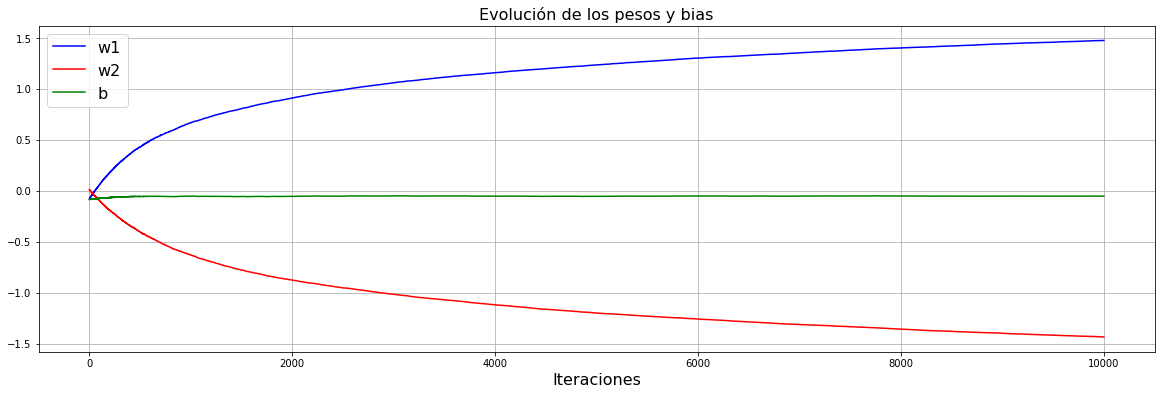

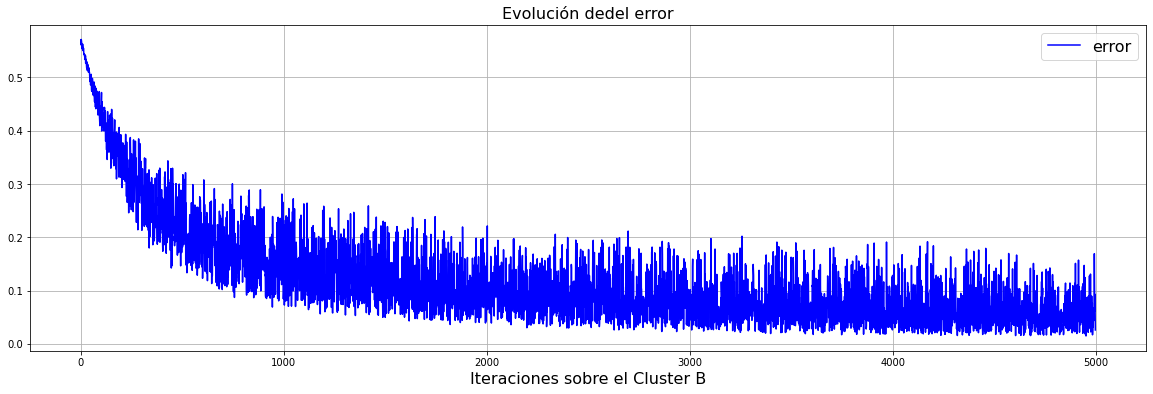

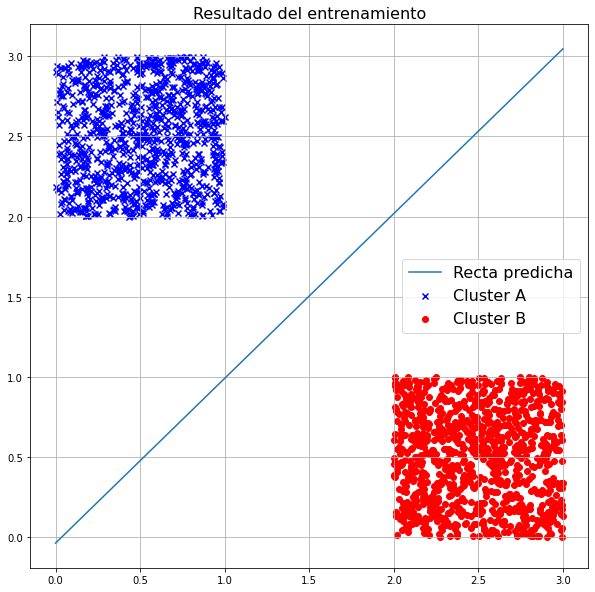

In [ ]:
#Grafica de la evolución de pesos y bias en función de las iteraciones
fig1 = plt.figure(figsize=(20,6))
plt.plot(n1.weights[:,0], color='blue', label='w1')
plt.plot(n1.weights[:,1], color='red', label='w2')
plt.plot(n1.bias, color='green', label='b')
plt.grid()
plt.legend(fontsize=16)
plt.title('Evolución de los pesos y bias', fontsize=16)
plt.xlabel('Iteraciones', fontsize=16)
plt.show()

#Grafica de la evolución del error en función de las iteraciones
fig2 = plt.figure(figsize=(20,6))
plt.plot(n1.errores[n1.errores>=0], color='blue', label='error')
plt.grid()
plt.legend(fontsize=16)
plt.title('Evolución dedel error', fontsize=16)
plt.xlabel('Iteraciones sobre el Cluster B', fontsize=16) #Dado que realizamos iteraciones alternadas entre el cluster A y B, la cantidad de coeficientes de error para cada cluster serán las iteraciones totales/2
plt.show()

#Resultado Final
x = np.arange(0,3.1,0.1)
y = (-n1.weights[-1][0]/n1.weights[-1][1])*x - n1.bias[-1]/n1.weights[-1][1]
fig3 = plt.figure(figsize=(10,10))
plt.scatter(cluster_A[:,0], cluster_A[:,1], marker='x', color='blue', label='Cluster A')
plt.scatter(cluster_B[:,0], cluster_B[:,1], marker='o', color='red', label='Cluster B')
plt.plot(x, y, label='Recta predicha')
plt.grid()
plt.legend(fontsize=16)
plt.title('Resultado del entrenamiento', fontsize=16)
plt.show()

Se observa como los valores de los pesos y bias convergen con el aumento de las iteraciones. Por otro lado, el error es continuamente descendiente, lo que nos asegura un correcto entrenamiento de la Neurona.

### 3.3. Ploteo iteraciones intermedias

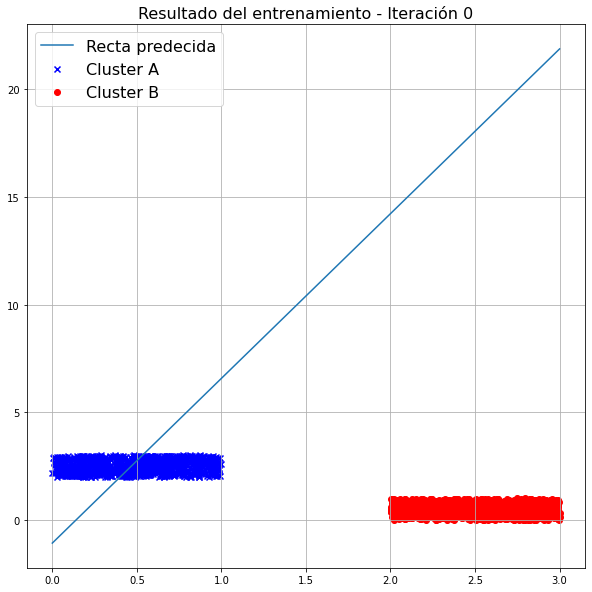

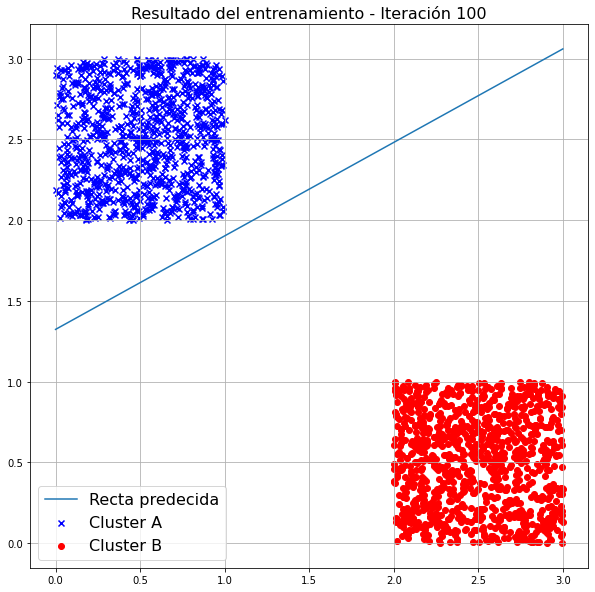

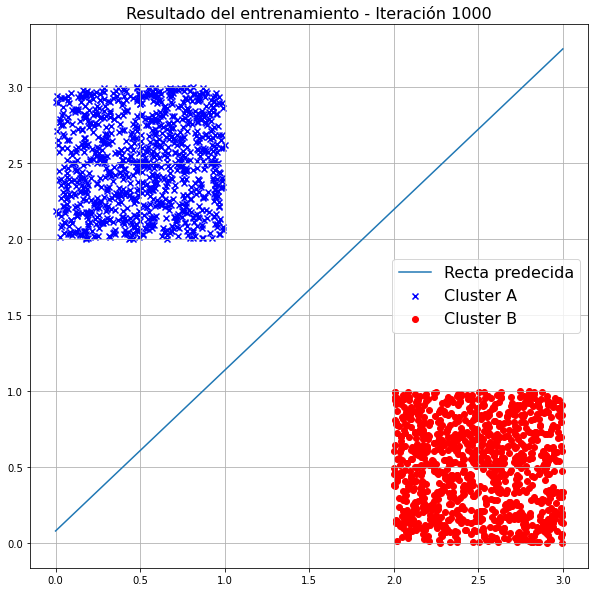

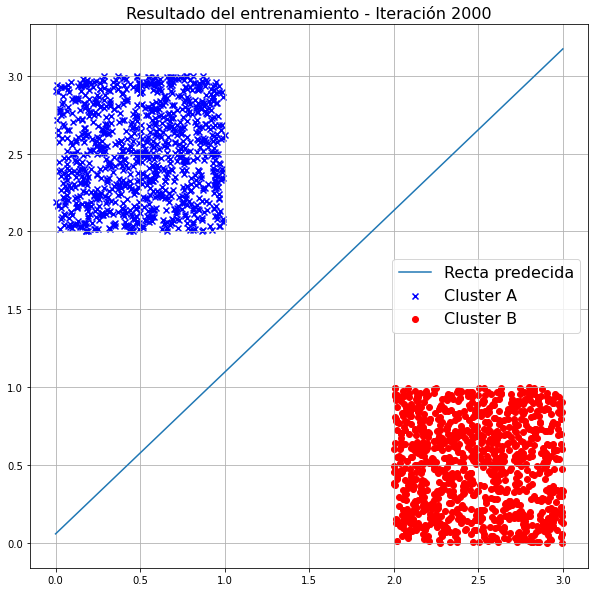

In [ ]:
def plot_result(w1,w2,b,n_iter,cluster_A=cluster_A, cluster_B=cluster_B):
  x = np.arange(0,3.1,0.1)
  y = -(w1/w2)*x - b/w1
  fig3 = plt.figure(figsize=(10,10))
  plt.scatter(cluster_A[:,0], cluster_A[:,1], marker='x', color='blue', label='Cluster A')
  plt.scatter(cluster_B[:,0], cluster_B[:,1], marker='o', color='red', label='Cluster B')
  plt.plot(x, y, label='Recta predecida')
  plt.grid()
  plt.legend(fontsize=16)
  plt.title(f'Resultado del entrenamiento - Iteración {n_iter}', fontsize=16)
  plt.show()

plot_result(n1.weights[0][0], n1.weights[0][1], n1.bias[0], 0) #Iteración Nº 0
plot_result(n1.weights[100][0], n1.weights[100][1], n1.bias[100], 100) #Iteración Nº 100
plot_result(n1.weights[1000][0], n1.weights[1000][1], n1.bias[1000], 1000) #Iteración Nº 1000
plot_result(n1.weights[2000][0], n1.weights[2000][1], n1.bias[2000], 2000) #Iteración Nº 2000

Se observa como a partir de la iteración Nº 100 ya se obtiene un resultado completamente satisfactorio para el caso de aplicación, dado que el hiperplano clasifica todos los puntos de los cluster sin error.

### 3.4. Test de prueba con 100 muestras para cada cluster

In [ ]:
#Generamos las muestras para cada Cluster
n_samples = 100

cluster_test_A = []
cluster_test_B = []

for i in range(n_samples):
  cluster_test_A.append((np.random.uniform(0,1), np.random.uniform(2,3)))
cluster_test_A = np.array(cluster_test_A)

for i in range(n_samples):
  cluster_test_B.append((np.random.uniform(2,3), np.random.uniform(0,1)))
cluster_test_B = np.array(cluster_test_B)

cluster_test_merged = np.vstack((cluster_test_A, cluster_test_B))
np.random.shuffle(cluster_test_merged) #Mezclamos las muestras para dar un poco de aleatoreidad al orden en que se irán sucediendo los puntos de cada cluster

In [ ]:
#Calculamos la salida de la neurona para cada punto generado anteriormente
outs = []
for i in range(len(cluster_test_merged)):
  y = n1.test(cluster_test_merged[i])
  outs.append(y)
outs = np.array((outs))

Puntos pertenecientes al Cluster A: 100
Puntos pertenecientes al Cluster B: 100


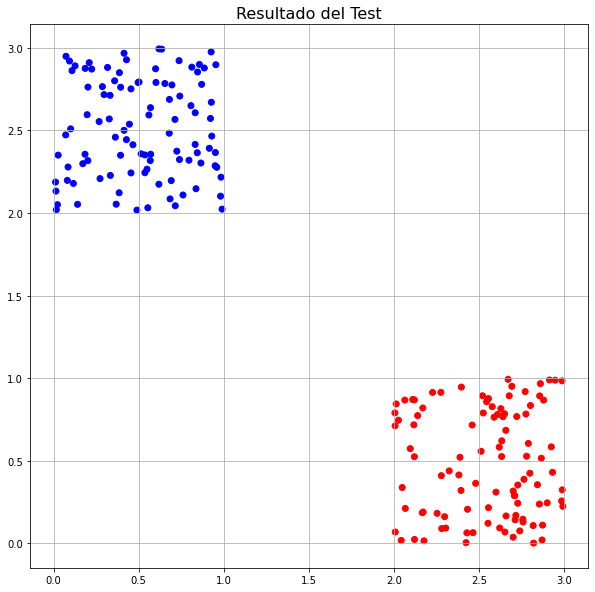

In [ ]:
threshold = 0.5 #Umbral para determinar a que cluster pertenece cada punto en base a la salida de una RN

print(f"Puntos pertenecientes al Cluster A: {outs[outs < threshold].shape[0]}")
print(f"Puntos pertenecientes al Cluster B: {outs[outs > threshold].shape[0]}")

#Creamos una máscara para colorear los puntos dependiendo del cluster al que pertenecen
aux = np.copy(outs)
aux[aux < threshold] = 0
aux[aux > threshold] = 1
aux = aux.astype(int)
colormap = np.array(['b','r'])

fig3 = plt.figure(figsize=(10,10))
plt.scatter(cluster_test_merged[:,0], cluster_test_merged[:,1], c=colormap[aux])
plt.grid()
plt.title('Resultado del Test', fontsize=16)
plt.show()


Conclusión: Se observa una correcta clasificación para cada punto del set de prueba creado aleatoriamente anteriormente.